<a href="https://colab.research.google.com/github/egbubemi/Banck_Customer_Churning_Prediction/blob/main/bank_churn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the necessary libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
dataset = pd.read_csv("Bank Customer Churn Prediction.csv")

In [ ]:
#view the first five rows of the dataset
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#understand the shape of the dataframe....there are 1000 rows and 12 columns


dataset.shape

(10000, 12)

In [ ]:
#analysing the datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
#evaluating the statistical details of the dataset, the transpose function is used so as to make sure that all
#columns are seen at a glance without any hidden columns

dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


In [ ]:
#checking for any missen values in the dataset

dataset.isnull().sum().sum()

0

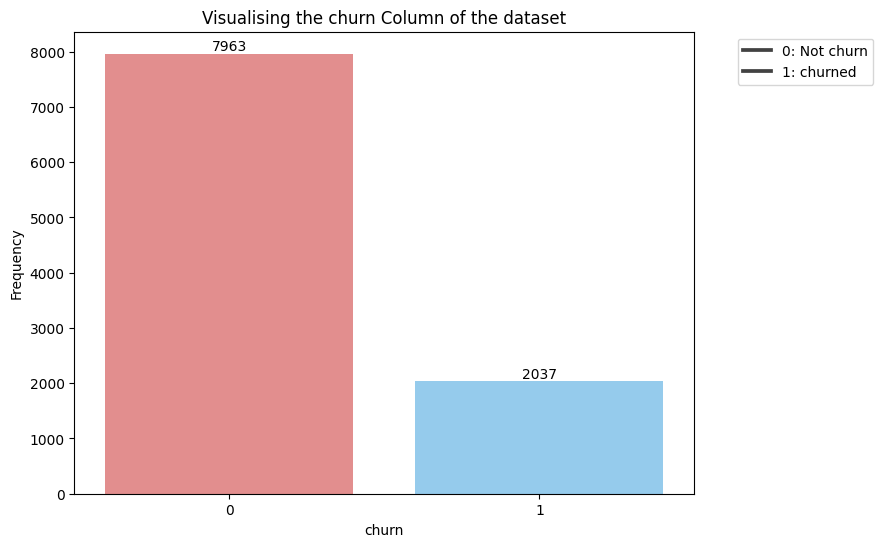

In [ ]:
# Getting the Dataset Column "Class" distribution frequency
# Using sns.barplot to plots a histogram 
# of the values in the Class column of the DataFrame DFDivorceData

# Group by Class column and count values
churn_counts = dataset.groupby('churn')['churn'].count()

# Create bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#F08080', '#87CEFA'])

# Add labels and title
plt.xlabel('churn')
plt.ylabel('Frequency')
plt.title(f"Visualising the churn Column of the dataset")

# Show legend
legend_labels = ['High', 'Low']
plt.legend(['0: Not churn', '1: churned'], loc="upper right", bbox_to_anchor=(1.3, 1))

# Add frequency values on top of each bar
for index, value in enumerate(churn_counts):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

# Display plot
plt.show()

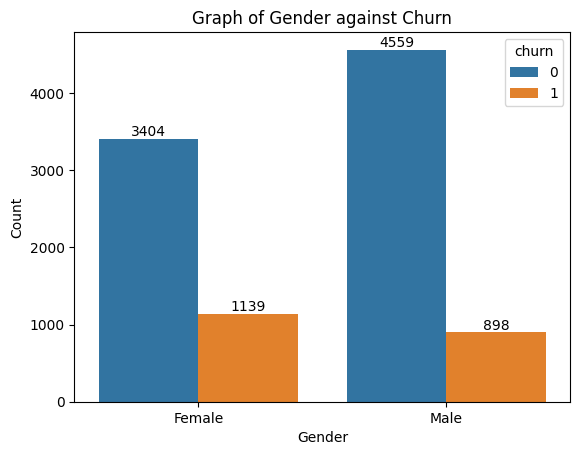

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the customer data in a DataFrame called 'dataset'

# Group by gender and churn
gender_churn = dataset.groupby(['gender', 'churn']).size().reset_index(name='count')

# Plot the bar chart
ax = sns.barplot(x='gender', y='count', hue='churn', data=gender_churn)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Graph of Gender against Churn')

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


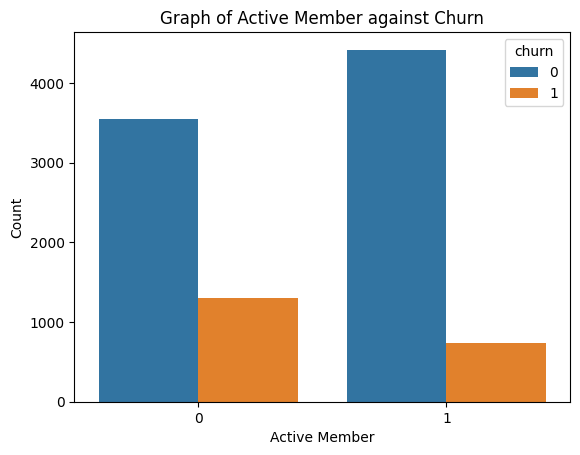

In [ ]:


# Group by active_member and churn
active_churn = dataset.groupby(['active_member', 'churn']).size().reset_index(name='count')

# Plot the bar chart
sns.barplot(x='active_member', y='count', hue='churn', data=active_churn)
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.title('Graph of Active Member against Churn')
plt.show()


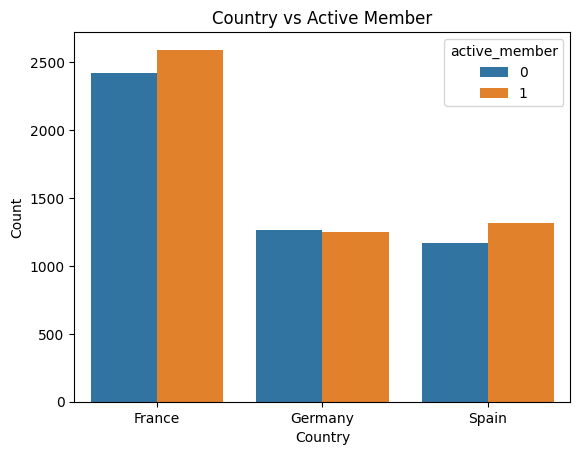

In [ ]:
# Group by country and active_member
country_active = dataset.groupby(['country', 'active_member']).size().reset_index(name='count')

# Plot the bar chart
sns.barplot(x='country', y='count', hue='active_member', data=country_active)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country vs Active Member')
plt.show()


In [ ]:
country_active

,country,active_member,count
0,France,0,2423
1,France,1,2591
2,Germany,0,1261
3,Germany,1,1248
4,Spain,0,1165
5,Spain,1,1312


In [ ]:

# Group by age intervals and churn
#dataset['age_group'] = pd.cut(dataset['age'], bins=range(0, 101, 10))
#age_churn = dataset.groupby(['age_group', 'churn']).size().reset_index(name='count')

# Plot the bar chart
#sns.barplot(x='age_group', y='count', hue='churn', data=age_churn)
#plt.xlabel('Age Group')
#plt.ylabel('Count')
#plt.title('Age Group vs Churn')
#plt.xticks(rotation=45)
#plt.show()

In [ ]:
#age_churn

<ipython-input-128-c9f46c8b0cd3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


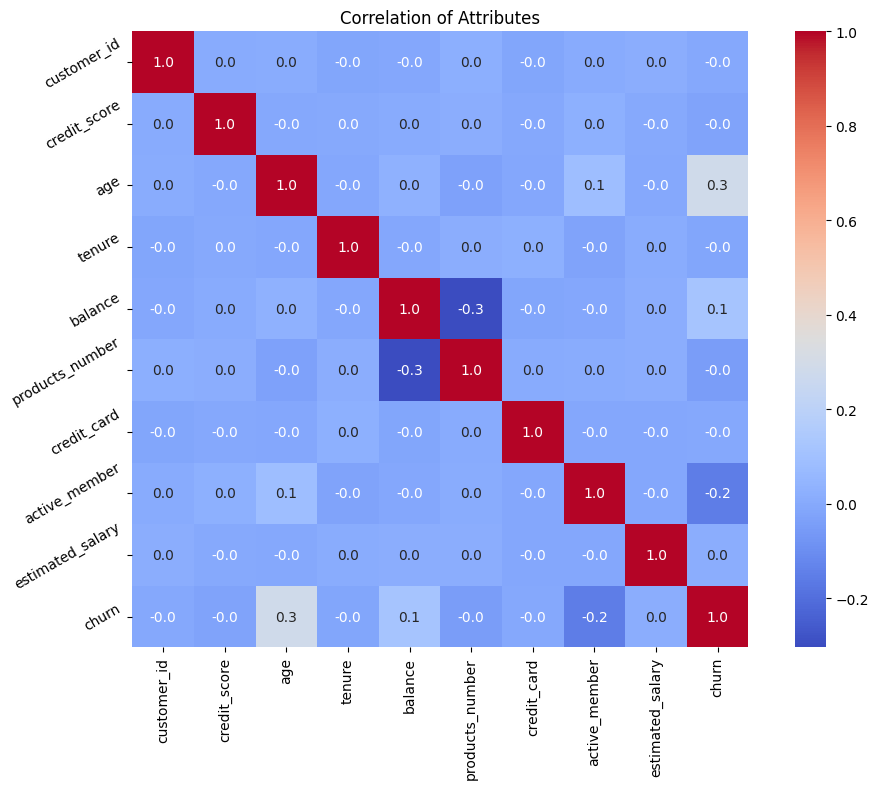

In [ ]:
#creating the correlation matrix to spot relationships between the variables
#function fmt has been set to .1g so that the matrix displays with one decimal place for better readability
# annot = true helps display the correlation coefficient
#the matrix below shows there is good correlation between the variables

correlation = dataset.corr()

plt.figure(figsize=(12,8))
plt.title('Correlation of Attributes')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.1f', linecolor='white', cmap= 'coolwarm')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

MODEL TRAINING AND EVALUATION

In [ ]:
# splitting the data set into features and target columns
#nnote some columns are not needed for the machine classification hence we removed them

X = dataset.iloc[:, [1,4,5,6,7,8,9,10]].values  
y = dataset.iloc[:, 11].values

In [ ]:
#spitting the dataset to train set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# Getting the Shapes of the Training and Test Data
print("------------------Multi Dimension---------------------------")
print("Shape of X_train: ", X_train.shape)
print("Number of rows in X_train: ", X_train.shape[0])
print("Number of columns in X_train: ", X_train.shape[1])
print("---------")
print("Shape of X_test: ", X_test.shape)
print("Number of rows in X_test: ", X_test.shape[0])
print("Number of columns in X_test: ", X_test.shape[1])
print("------------------Single Dimension---------------------------")
print("Shape of Y_train: ", y_train.shape)
print("Number of rows in y_train: ", y_train.shape[0])
print("Shape of y_test: ", y_test.shape)
print("Number of rows in y_test: ", y_test.shape[0])

------------------Multi Dimension---------------------------
Shape of X_train:  (7000, 8)
Number of rows in X_train:  7000
Number of columns in X_train:  8
---------
Shape of X_test:  (3000, 8)
Number of rows in X_test:  3000
Number of columns in X_test:  8
------------------Single Dimension---------------------------
Shape of Y_train:  (7000,)
Number of rows in y_train:  7000
Shape of y_test:  (3000,)
Number of rows in y_test:  3000


In [ ]:
#dropping constant features with similar values and provide no information that that helps ML models to predict the target

from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)  
X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 8 features remain


In [ ]:
#scaling the dataset

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)


In [ ]:
#training the model using KNN

from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)
classifier.fit(X_train_fs, y_train)

KNeighborsClassifier(p=3)

In [ ]:
#Evaluating the model and predicting the test results

y_pred=classifier.predict(X_test_fs)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Evaluating the performance of the model

from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n' %(acc))

accuracy:0.84




In [ ]:
#Confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(cm, '\n\n')

Confusion Matrix
[[2281  135]
 [ 346  238]] 




In [ ]:
#Classification report

result=metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2416
           1       0.64      0.41      0.50       584

    accuracy                           0.84      3000
   macro avg       0.75      0.68      0.70      3000
weighted avg       0.82      0.84      0.83      3000



### NEURAL NETWORK

In [ ]:

# Dropping multiple columns
columns_to_drop = ["country", "age", "gender"]
dataset = dataset.drop(columns_to_drop, axis=1)


In [ ]:
X_train

array([[6.1900000e+02, 3.2000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.7279243e+05],
       [6.4300000e+02, 3.4000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.8853311e+05],
       [5.6100000e+02, 3.3000000e+01, 6.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7368039e+05],
       ...,
       [7.3500000e+02, 3.8000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.2220120e+04],
       [6.6700000e+02, 4.3000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.7508040e+04],
       [6.9700000e+02, 5.1000000e+01, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 5.3581140e+04]])

In [ ]:
X = dataset.drop('churn',axis=1)
y = dataset['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify=y, random_state=99)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(8,)))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.utils import class_weight

class_weights = {0:3, 1:1}

In [ ]:
history = model.fit(X_train, y_train, \
                    batch_size = 8, epochs= 50, \
                    verbose=2, class_weight=class_weights, \
                    validation_split=0.2)


Epoch 1/50
700/700 - 2s - loss: 0.9778 - accuracy: 0.7609 - val_loss: 0.5555 - val_accuracy: 0.8014 - 2s/epoch - 3ms/step
Epoch 2/50
700/700 - 1s - loss: 0.7237 - accuracy: 0.7950 - val_loss: 0.5647 - val_accuracy: 0.8014 - 917ms/epoch - 1ms/step
Epoch 3/50
700/700 - 1s - loss: 0.7039 - accuracy: 0.7950 - val_loss: 0.5385 - val_accuracy: 0.8014 - 1s/epoch - 2ms/step
Epoch 4/50
700/700 - 1s - loss: 0.6911 - accuracy: 0.7950 - val_loss: 0.5261 - val_accuracy: 0.8014 - 1s/epoch - 2ms/step
Epoch 5/50
700/700 - 2s - loss: 0.6748 - accuracy: 0.7950 - val_loss: 0.5178 - val_accuracy: 0.8021 - 2s/epoch - 2ms/step
Epoch 6/50
700/700 - 2s - loss: 0.6512 - accuracy: 0.7979 - val_loss: 0.5056 - val_accuracy: 0.8043 - 2s/epoch - 2ms/step
Epoch 7/50
700/700 - 2s - loss: 0.6298 - accuracy: 0.8021 - val_loss: 0.4711 - val_accuracy: 0.8143 - 2s/epoch - 3ms/step
Epoch 8/50
700/700 - 1s - loss: 0.6157 - accuracy: 0.8093 - val_loss: 0.4762 - val_accuracy: 0.8171 - 1s/epoch - 2ms/step
Epoch 9/50
700/700 - 

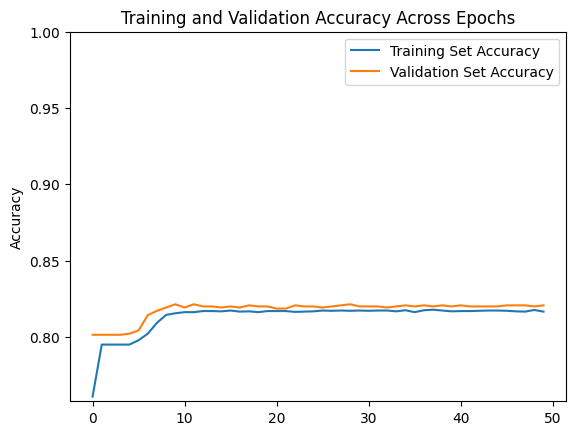

In [ ]:
accuracy = history.history['accuracy'] 
validation_accuracy = history.history['val_accuracy'] 

plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

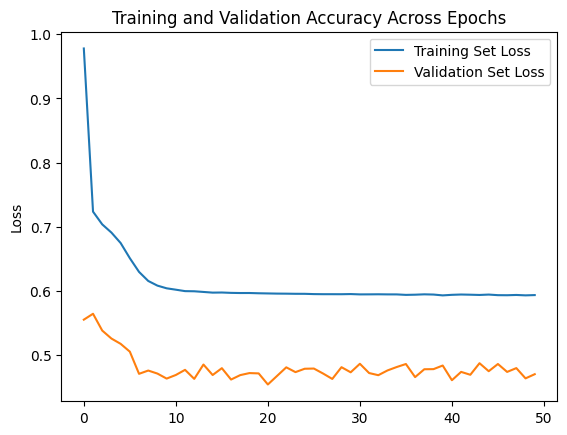

In [ ]:
loss = history.history['loss'] 
validation_loss = history.history['val_loss'] 
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=1)

94/94 [==============================] - 0s 1ms/step


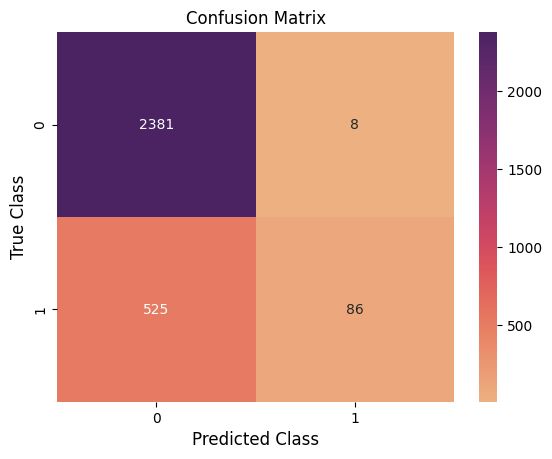

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2389
           1       0.91      0.14      0.24       611

    accuracy                           0.82      3000
   macro avg       0.87      0.57      0.57      3000
weighted avg       0.84      0.82      0.77      3000

